In [1]:
import matplotlib.pyplot as plt
import numpy as np
import blip_analysis as ba
import pickle
from matplotlib.gridspec import GridSpec
from sklearn.metrics import confusion_matrix
import exp_blip_models as em
import matplotlib
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
import sys
sys.path.append('/home/camp/warnert/label_axes')
from label_axes import label_axes
import scipy
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

b


In [8]:
glyphs = ba.get_glyphs()

In [2]:
res1 = np.load('../Fig2/221026_de_1d_res_odour1_extended.npy')
res2 = np.load('../Fig2/221027_de_1d_res_odour2_extended.npy')
res3 = np.load('../Fig2/221027_de_1d_res_odour3_extended.npy')
res1 = np.array(res1).reshape(50, 162, 32)
res2 = np.array(res2).reshape(50, 162, 32)
res3 = np.array(res3).reshape(50, 162, 32)

In [3]:
def flip_distances(distances):
    distances_normed = distances - np.mean(distances, axis=1)[:, np.newaxis]
    distances_flipped = [distances_normed[0]]
    for i in range(1, len(distances)):
        prev_distance = distances_flipped[-1]
        distance = distances_normed[i]
        if np.sum(abs(distance - prev_distance )) < np.sum(abs(distance + prev_distance)):
            distances_flipped.append(distance)
        else:
            distances_flipped.append(-distance)
    return distances_flipped

def flip_flip_distances(distances):
    #flipped_distances = np.array([flip_distances(i) for i in distances])
    flipped_flipped_distances = [distances[0]]

    for i in range(1, len(distances)):
        if np.sum(np.abs(distances[0]+distances[i])) > np.sum(np.abs(distances[0]-distances[i])):
            flipped_flipped_distances.append(distances[i])
        else:
            flipped_flipped_distances.append(-distances[i])
    return np.array(flipped_flipped_distances)

In [4]:
flipped_distance = flip_flip_distances(res1)

In [5]:
closests1 = [res1[0, 0]]
closests2 = [res2[0, 0]]
closests3 = [res3[0, 0]]
for i in range(1, 162):
    prev_distance = closests1[-1]
    diffs = np.mean(np.abs(res1[:, i] - prev_distance), axis=-1)
    min_diff = np.argmin(diffs)
    closests1.append(res1[min_diff, i])
    
    prev_distance = closests2[-1]
    diffs = np.mean(np.abs(res2[:, i] - prev_distance), axis=-1)
    min_diff = np.argmin(diffs)
    closests2.append(res2[min_diff, i])
    
    prev_distance = closests3[-1]
    diffs = np.mean(np.abs(res3[:, i] - prev_distance), axis=-1)
    min_diff = np.argmin(diffs)
    closests3.append(res3[min_diff, i])

32
32
32
32


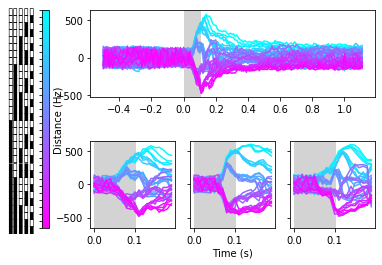

In [32]:
def plot_1d_distance_graph(xs, distances, ax, colors=None, cmap=matplotlib.cm.plasma):
    distances = np.array(distances)
    trial_len = distances.shape[1]
    if colors is None:
        colors = [cmap(i/trial_len) for i in range(trial_len)]

    print(len(colors))
    for index, i in enumerate(distances.T):
        ax.plot(xs, i, color=colors[index])
    ax.axvspan(0, 0.1, color='lightgray')
    
def distance_plots(fig, gs_base, xs, closests, cmap=matplotlib.cm.plasma, hspace=0.5):

    closests1, closests2, closests3 = closests
    sub_gridspec = gs_base.subgridspec(ncols=14, nrows=2, wspace=1.5, hspace=hspace)
    big_ax = fig.add_subplot(sub_gridspec[0, 2:])
    small_ax1 = fig.add_subplot(sub_gridspec[1, 2:6])
    small_ax2 = fig.add_subplot(sub_gridspec[1, 6:10])
    small_ax3 = fig.add_subplot(sub_gridspec[1, 10:])
    
    small_ax2.set_yticklabels([])
    small_ax3.set_yticklabels([])
    plot_1d_distance_graph(xs, closests1, big_ax, cmap=cmap)

    cbar_ax = fig.add_subplot(sub_gridspec[:, 0])
    cbar_ax.yaxis.set_ticks_position('left')
    plot_cbar_and_glyphs(cbar_ax, glyphs, cmap.reversed())
    cbar_ax.yaxis.set_ticks_position('left')
    plot_1d_distance_graph(xs[50:70], closests1[50:70], small_ax1, cmap=cmap)
    plot_1d_distance_graph(xs[50:70], closests2[50:70], small_ax2, cmap=cmap)
    plot_1d_distance_graph(xs[50:70], closests3[50:70], small_ax3, cmap=cmap)
    
    min_max = np.max(np.abs(np.concatenate([small_ax1.get_ylim(), small_ax2.get_ylim(), small_ax3.get_ylim()])))
    small_ax1.set_ylim(-min_max, min_max)
    small_ax2.set_ylim(-min_max, min_max)
    small_ax3.set_ylim(-min_max, min_max)
    label_ax = fig.add_subplot(sub_gridspec[:, 2:], frameon=False)
    label_ax.set_xticks([])
    label_ax.set_yticks([])
    label_ax.set_ylabel('Distance (Hz)', labelpad=27)
    label_ax.set_xlabel('Time (s)', labelpad=20)
    return [big_ax, small_ax1, small_ax2, small_ax3, cbar_ax]
def plot_cbar_and_glyphs(ax, glyphs, cmap):
    im = ax.imshow(np.array([[0, 1]]), aspect=30, cmap=cmap)
    cbar = plt.colorbar(cax=ax, mappable=im)
    cbar.set_ticks(np.linspace(0, 1, len(glyphs)))
    cbar.set_ticklabels(glyphs[::-1])

fig = plt.figure()
gs = GridSpec(1, 1)
xs = np.arange(-.5, 1.12, 1/100)

distance_plots(fig, gs[0], xs, np.array([closests1, closests2, closests3]), cmap=matplotlib.cm.cool)


In [19]:
trial_array = ba.get_trial_array()
conc_count = np.sum(trial_array, axis=1)
sorted_args = np.argsort(conc_count)


[ 0  1  2 16  4  8 20 12 10  9 24  6  5  3 17 18 28 22 21 13 14 25 11  7
 19 26 29 15 23 30 27 31]


In [23]:
conc_closests1 = np.array(closests1)[:, sorted_args]
conc_closests2 = np.array(closests2)[:, sorted_args]
conc_closests3 = np.array(closests3)[:, sorted_args]

32
32
32
32


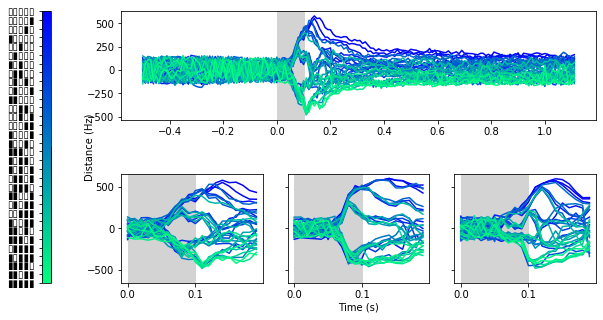

In [38]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 1)
xs = np.arange(-.5, 1.12, 1/100)

axs = distance_plots(fig, gs[0], xs, np.array([conc_closests1, conc_closests2, conc_closests3]), cmap=matplotlib.cm.winter)
axs[-1].set_yticklabels(np.array(glyphs)[sorted_args][::-1]);
plt.savefig('230703_conc_labelled_distances.pdf', bbox_inches='tight')